# How People Play Videos 


In order to open and describe our dataframe we need to download our dataframe on Jupyter. Right after we must open the file and see how it is composed so that we can choose the proper function that will allow us to read it properly.

In [1]:
library(tidyverse)
library(readr)
library(dplyr)
options
url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
download.file(url, destfile = "players.csv")
players_data <- read_csv("players.csv")
           
head(players_data)

# colSums(is.na(players))
# dim(players)       

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


function (...) 
.Internal(options(...))
<bytecode: 0x55ed47797990>
<environment: namespace:base>

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA



**Data description**

Thabkfully are data is tidy allowing us to clear analyze the information collected. 
So we notice that we have:

- 9 variables(colunms): experience(chracter), subscribe(logic), hashedemail(character), played_hours(double), name(character), gender(character), age(double), individualId(logic), organizationName(logic). We have in total 7 categorical and 2 numerical colunms.

- Meaning of each variable:
  - experience: it represents how proficient is the player
  - subscribe: participants' allowace to recieve notifications via e-mail.
  - hashedemail: e-mail provided by participants to participate in the study.
  - played_hours: numerical information that represents the amount of time spent playing.
  - name: individuals designation.
  - gender: sex of the person who participated in the study.
  - age: it represents the age of the person.
  - individualId(logic)
  - organizationName

- Some issues with the data:
  - the variable hashedemail has an information that is not possible to be read by humans. This            information is hidden to protect participants' privacy.
  - IndividualId(logic) and organizationName(logic) have 392 missing data.
  - There are 5 participants that have in total 769.4 hours. Those hours for sure will affect our          analysis.
    Specially the non-binary person who has played 218.10 hours. That is very crucial specially when       we have sample of only 15 indivuals who indentifies as non-binary. If they are the administrators      or moderators we definitely need to remove them to have a better result.
     
- 196 observations(rows).

- The dataframe has been collected by registration where you have to provide your name, age, gender,    e-mail and the number of hours were recorded by enteting to the server with your username.
   

### Question 1: Are people's proficiency and age in Minecraft related to the number of playing hours?

First, we must choose our variables that we will use in order to start the analysis so that we can answer the question. The variables that we are going to take are experience, played_hours, age and gender because we want to know if there is any correlation between them that will help us determine the type of contributors.

Additionally, we would like to see if there is any difference in contributiong between sexes. So that we can understand the motives behind. 

In [2]:
players_selection <- players_data|>
                    select(experience, played_hours, age, gender)

head(players_selection)

experience,played_hours,age,gender
<chr>,<dbl>,<dbl>,<chr>
Pro,30.3,9,Male
Veteran,3.8,17,Male
Veteran,0.0,17,Male
Amateur,0.7,21,Female
Regular,0.1,21,Male
Amateur,0.0,17,Female


Secondly, we will indentify the number of players based on their experience and gender in order to analyse their contribution to the data. Farther more, we will also find the average age based on the same categories.

In [3]:
experience_count <- players_data|>
                group_by(experience)|>
                summarize(count = n(), .group = "drop")

gender_count <- players_data|>
                group_by(gender)|>
                summarize(count = n(), .group = "drop")

average_age <- players_data|>
               group_by(gender)|>
               summarize(average_age = mean(age, na.rm = TRUE))

average_experience <- players_data|>
                      group_by(experience)|>
                      summarize(average_age = mean(age, na.rm = TRUE))


experience_count
gender_count
average_age
average_experience

experience,count,.group
<chr>,<int>,<chr>
Amateur,63,drop
Beginner,35,drop
Pro,14,drop
Regular,36,drop
Veteran,48,drop


gender,count,.group
<chr>,<int>,<chr>
Agender,2,drop
Female,37,drop
Male,124,drop
Non-binary,15,drop
Other,1,drop
Prefer not to say,11,drop
Two-Spirited,6,drop


gender,average_age
<chr>,<dbl>
Agender,23.50000
Female,21.81081
Male,20.20968
Non-binary,19.06667
Other,91.00000
Prefer not to say,21.36364
Two-Spirited,33.16667


experience,average_age
<chr>,<dbl>
Amateur,20.25397
Beginner,21.65714
Pro,22.21429
Regular,22.77778
Veteran,20.95833


Thridly, we noticed the average age of all the type of player based on their experience is roughtly 20 years which is normal due to the study being conducted at the university.
Therefore age is not an important variable to our analysis. 

In consequence, we will compare experience and gender with the playing time to understand what kind of players are playing the most.

In [4]:
exp_vs_time <- players_data|>
               group_by(experience)|>
               summarize(avg_exp_time_played = mean(played_hours, na.rm = TRUE))|>
               arrange(-avg_exp_time_played )

gender_vs_time <- players_data|>
               group_by(gender)|>
               summarize(avg_gender_time_played = mean(played_hours, na.rm = TRUE))|>
               arrange(-avg_gender_time_played)

exp_vs_time
gender_vs_time


experience,avg_exp_time_played
<chr>,<dbl>
Regular,18.2083333
Amateur,6.0174603
Pro,2.6000000
Beginner,1.2485714
Veteran,0.6479167


gender,avg_gender_time_played
<chr>,<dbl>
Non-binary,14.88000000
Female,10.63513514
Agender,6.25000000
Male,4.12741935
Prefer not to say,0.37272727
Other,0.20000000
Two-Spirited,0.08333333


We can realize that the highest contribution by regular/average player with 18.21 and by non-binary participants with 14.88 hours played.

However, as it was mentioned before in the description of the dataframe there are certain outliers that are affecting the data and will not help us reflect the reality.

We will find out by finding the top 10 contributors by gender and experience.

In [5]:
outliers_contributors <- players_data|>
                         select(gender, played_hours)|>
                         slice_max(order_by = played_hours, n = 10)
outliers_contributors 

gender,played_hours
<chr>,<dbl>
Male,223.1
Non-binary,218.1
Female,178.2
Female,150.0
Male,56.1
Male,53.9
Female,48.4
Male,32.0
Male,30.3


There are five individuals that have 769.4 together. That is specially very disruptive for the non-binary and female because they have a small amount of observations. Specially the non-binary category that has only 15 observations.

We will use a bar graph to better understand our varaibles and if they will help us answer the question.

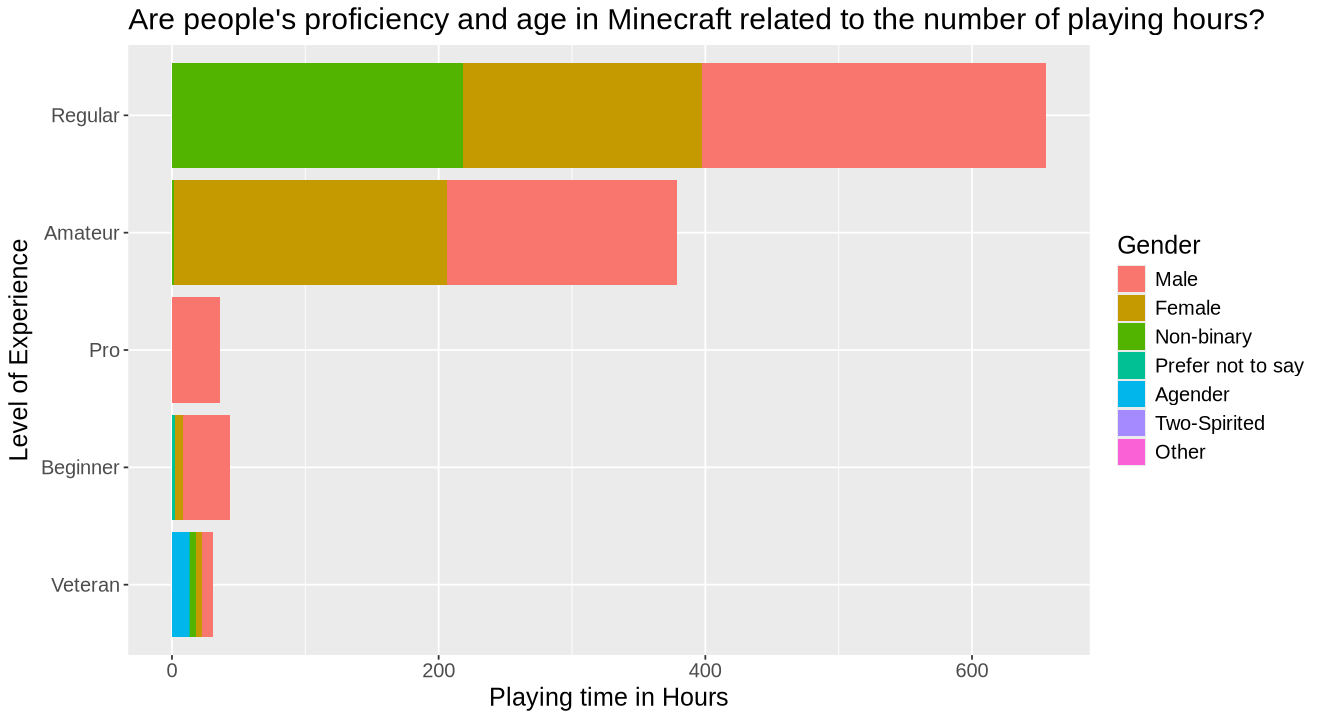

In [17]:
options(repr.plot.width=11, repr.plot.height=6)
players_plot <- players_data|>
                ggplot(aes(x = played_hours, y = reorder(experience, played_hours), fill = as_factor(gender))) +
                geom_bar(stat = "identity")+
                labs(x = "Playing time in Hours", y = "Level of Experience", fill = "Gender")+
                ggtitle("Are people's proficiency and age in Minecraft related to the number of playing hours?")+
                theme(text = element_text(size = 20))
players_plot

Due to the graph, we know now that the biggest contribution is done by the regulars and amateurs. 
So we will now create a scatterplot based on age and playing time.

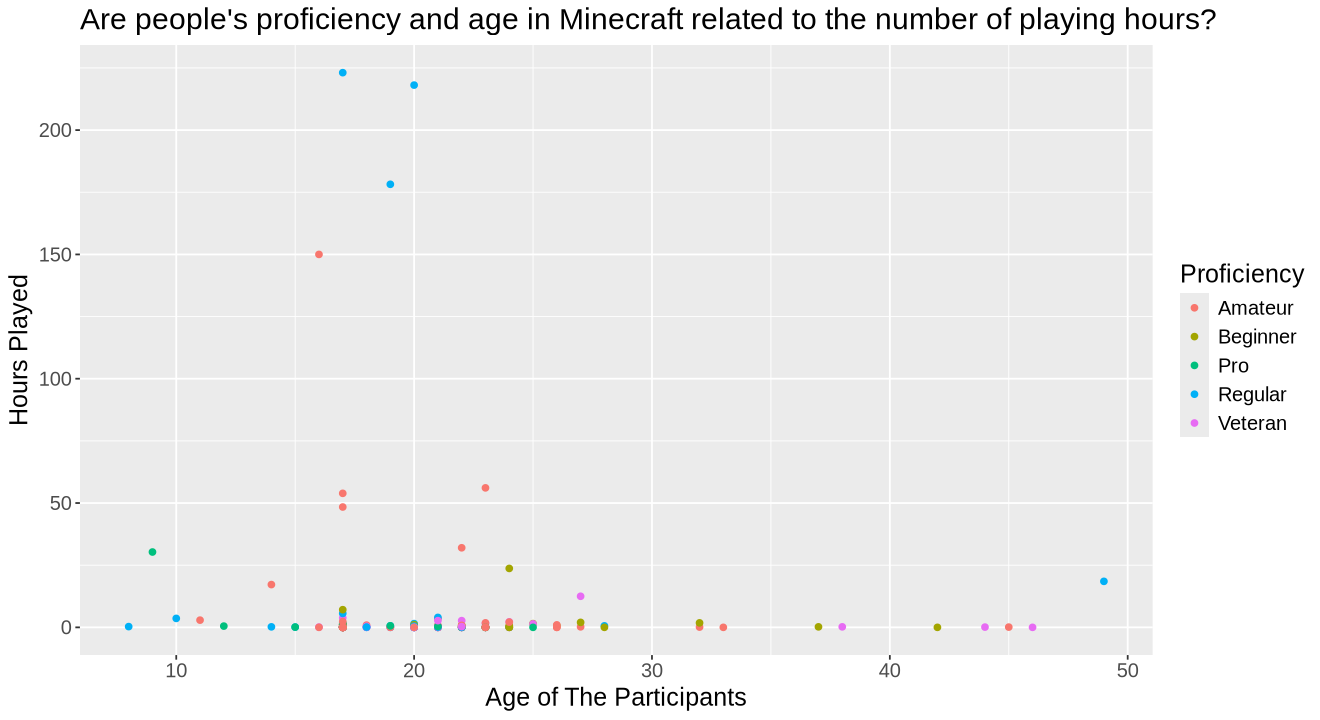

In [44]:
options(repr.plot.width=11, repr.plot.height=6)


players_plot <- players_data|>
                filter(age < 50)|>
                ggplot(aes(x = age, y = played_hours , color = experience)) +
                geom_point()+
                labs(x = "Age of The Participants", y = "Hours Played", color = "Proficiency")+
                ggtitle("Are people's proficiency and age in Minecraft related to the number of playing hours?")+
                theme(text = element_text(size = 15))
players_plot